In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


Number of faces detected: 1


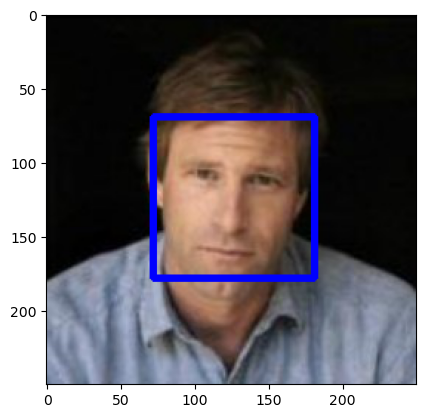

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector

face_cascade = cv2.CascadeClassifier("E:\Mini Project\opencv-master\data\haarcascades\haarcascade_frontalface_alt.xml")

img = cv2.imread(human_files[0])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.03, 3)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    #cv2.recctange(image, start_point, end_point, color, thickness)
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),3)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

In [3]:
# returns "True" if face is detected in image stored at img_path

def face_detector(img_path):
    #new_img_path = open_file()
    img = plt.imread(img_path)
    print(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    print("----------------------------------")
    print(gray)
    #face_cascade function called
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

print('What percentage of the first 100 images in human_files have a detected human face?'
      '\n{:.0%}'.format(sum(map(face_detector, human_files_short)) / 100))
print('What percentage of the first 100 images in dog_files have a detected human face?'
      '\n{:.0%}'.format(sum(map(face_detector, dog_files_short)) / 100))

lfw\Aaron_Eckhart\Aaron_Eckhart_0001.jpg
----------------------------------
[[  0   0   0 ...   1   1   1]
 [  0   0   0 ...   0   0   0]
 [  0   0   1 ...   3   3   3]
 ...
 [127 133 141 ... 136 149 156]
 [126 128 135 ... 143 156 163]
 [122 124 131 ... 149 160 167]]
lfw\Aaron_Guiel\Aaron_Guiel_0001.jpg
----------------------------------
[[241 243 245 ...  79  82  82]
 [247 245 244 ...  79  81  81]
 [247 247 246 ...  79  81  81]
 ...
 [ 44  43  38 ...  47  47  47]
 [ 43  40  37 ...  41  42  42]
 [ 43  39  36 ...  39  38  39]]
lfw\Aaron_Patterson\Aaron_Patterson_0001.jpg
----------------------------------
[[253 253 253 ...  91  89  89]
 [253 253 253 ...  90  88  88]
 [253 253 253 ...  87  87  87]
 ...
 [172 171 169 ... 169 170 170]
 [177 175 173 ... 172 171 171]
 [177 175 173 ... 172 171 171]]
lfw\Aaron_Peirsol\Aaron_Peirsol_0001.jpg
----------------------------------
[[244 244 243 ... 239 239 239]
 [243 243 243 ... 239 239 239]
 [241 241 242 ... 239 239 239]
 ...
 [ 45  49  55 ...  59 

In [5]:
import torch
import torchvision.models as models


# define VGG16 model
VGG16 = models.vgg16(pretrained=True)
# usage of vgg16 : Uses GPU weights been trained using ImageNet a very large very popular dataset used for classification 
# check if CUDA is available

use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    print("YES")
    VGG16 = VGG16.cuda()

d:\Users\Alex Christopher\anaconda3\envs\newminiproj\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\Users\Alex Christopher\anaconda3\envs\newminiproj\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Users\Alex Christopher\anaconda3\envs\newminiproj\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


YES


In [6]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):

    pil_image = Image.open(img_path)
    transformed_image = transforms.Resize(224)(pil_image)
    transformed_image = transforms.CenterCrop(224)(pil_image)
    transformed_image = transforms.ToTensor()(transformed_image)
    transformed_image = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                             std=[0.229, 0.224, 0.225])(transformed_image)
    transformed_image = transformed_image.cuda() if torch.cuda.is_available() else transformed_image
    output_index = int((VGG16(transformed_image.unsqueeze(0))).argmax())
    return output_index # predicted class index

In [7]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.    
    return True if VGG16_predict(img_path) in range(151, 269) else False # true/false

In [8]:
print('What percentage of the images in human_files_short have a detected dog?'
      '\n{:.0%}'.format(sum(map(dog_detector, human_files_short)) / 100))
print('What percentage of the images in dog_files_short have a detected dog?'
      '\n{:.0%}'.format(sum(map(dog_detector, dog_files_short)) / 100))

What percentage of the images in human_files_short have a detected dog?
0%


KeyboardInterrupt: 

In [9]:
import os
from torchvision import datasets
import numpy as np
import torch
from PIL import ImageFile
from torchvision import transforms

ImageFile.LOAD_TRUNCATED_IMAGES = True
use_cuda = torch.cuda.is_available()

image_transforms = {'train': transforms.Compose([transforms.RandomRotation(10),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.RandomResizedCrop(224),                                     
                                     transforms.Resize(224),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                          std=[0.229, 0.224, 0.225])]),
                   'valid': transforms.Compose([transforms.Resize(224),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                          std=[0.229, 0.224, 0.225])]),
                   'test': transforms.Compose([transforms.Resize(224),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(), 
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                          std=[0.229, 0.224, 0.225])])
                  }

loaders_scratch = {'train': torch.utils.data.DataLoader(datasets.ImageFolder('dogImages/train', 
                                                                             transform=image_transforms['train']),
                                                        batch_size=25, shuffle=True),                    
                   'valid': torch.utils.data.DataLoader(datasets.ImageFolder('dogImages/valid', 
                                                                             transform=image_transforms['valid']),
                                                        batch_size=25, shuffle=True), 
                   'test': torch.utils.data.DataLoader(datasets.ImageFolder('dogImages/test', 
                                                                            transform=image_transforms['test']),
                                                        batch_size=25, shuffle=True)}

In [10]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.c1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.c2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.c3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        self.fc1 = nn.Linear(in_features=6272, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=256)
        self.fc3 = nn.Linear(in_features=256, out_features=412)
        self.fc4 = nn.Linear(in_features=412, out_features=133)
        
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.c1(x), 3))
        x = F.relu(F.max_pool2d(self.c2(x), 3))
        x = F.relu(F.max_pool2d(self.c3(x), 3))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return x

model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [11]:
import torch.optim as optim

criterion_scratch = nn.CrossEntropyLoss()

optimizer_scratch = optim.Adam(model_scratch.parameters(), lr = 0.0005)

In [12]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        train_loss = 0.0
        valid_loss = 0.0
        
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            output = model(data)
            loss = criterion(output, target)
            # print("Loss: {}".format(loss))
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))        
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        model.eval()
        total_correct = 0
        total = 0
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            max_arg_output = torch.argmax(output, dim=1)
            total_correct += int(torch.sum(max_arg_output == target))
            total += data.shape[0]
        print('Validation accuracy: {:.0%}'.format(total_correct/total))
        
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        if valid_loss_min > valid_loss:
            print("Saving the model...")
            valid_loss_min = valid_loss
            torch.save(model.state_dict(), save_path)

            
    # return trained model
    return model

In [13]:
# train the model
model_scratch = train(2, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pb')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pb'))

Validation accuracy: 3%
Epoch: 1 	Training Loss: 4.828994 	Validation Loss: 4.624971
Saving the model...
Validation accuracy: 4%
Epoch: 2 	Training Loss: 4.574325 	Validation Loss: 4.450260
Saving the model...


<All keys matched successfully>

In [14]:
def test(loaders, model, criterion, use_cuda):

    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        output = model(data)
        loss = criterion(output, target)
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        pred = output.data.max(1, keepdim=True)[1]
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [15]:
# call test function  
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.443939


Test Accuracy:  3% (33/836)


In [16]:
import numpy as np
import torch
from PIL import ImageFile
from torchvision import transforms,datasets

ImageFile.LOAD_TRUNCATED_IMAGES = True
use_cuda = torch.cuda.is_available()

image_transforms = {'train': transforms.Compose([transforms.RandomRotation(10),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.RandomResizedCrop(224),                                     
                                     transforms.Resize(224),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                          std=[0.229, 0.224, 0.225])]),
                   'valid': transforms.Compose([transforms.Resize(224),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                          std=[0.229, 0.224, 0.225])]),
                   'test': transforms.Compose([transforms.Resize(224),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(), 
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                                          std=[0.229, 0.224, 0.225])])
                  }

loaders_transfer = {'train': torch.utils.data.DataLoader(datasets.ImageFolder('dogImages/train', 
                                                                             transform=image_transforms['train']),
                                                        batch_size=25, shuffle=True),                    
                   'valid': torch.utils.data.DataLoader(datasets.ImageFolder('dogImages/valid', 
                                                                             transform=image_transforms['valid']),
                                                        batch_size=25, shuffle=True), 
                   'test': torch.utils.data.DataLoader(datasets.ImageFolder('dogImages/test', 
                                                                            transform=image_transforms['test']),
                                                        batch_size=25, shuffle=True)}

In [17]:
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F

model_transfer = models.resnet18(pretrained=True)

for param in model_transfer.parameters():
    param.requires_grad = False

num_ftrs = model_transfer.fc.in_features

class TransferLearning(nn.Module):
    def __init__(self):
        super(TransferLearning, self).__init__()
        self.fc1 = nn.Linear(in_features=num_ftrs, out_features=256)
        self.fc2 = nn.Linear(in_features=256, out_features=133)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model_transfer.fc = TransferLearning()

if use_cuda:
    model_transfer = model_transfer.cuda()

d:\Users\Alex Christopher\anaconda3\envs\newminiproj\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [18]:
import torch.optim as optim

criterion_transfer = torch.nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.parameters(), lr = 0.0005)

In [19]:
# load the model that got the best validation accuracy (uncomment the line below)
# train the model
model_transfer = train(2, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pb')
model_transfer.load_state_dict(torch.load('model_transfer.pb'))

Validation accuracy: 62%
Epoch: 1 	Training Loss: 3.617134 	Validation Loss: 1.631790
Saving the model...
Validation accuracy: 71%
Epoch: 2 	Training Loss: 1.866627 	Validation Loss: 0.983070
Saving the model...


<All keys matched successfully>

In [20]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.044902


Test Accuracy: 69% (580/836)


In [21]:
from PIL import Image
from torchvision  import transforms
from torch.nn.functional import softmax
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    pil_image = Image.open(img_path)
    transformed_image = transforms.Resize(224)(pil_image)
    transformed_image = transforms.CenterCrop(224)(pil_image)
    transformed_image = transforms.ToTensor()(transformed_image)
    transformed_image = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                             std=[0.229, 0.224, 0.225])(transformed_image)

    transformed_image = transformed_image.cuda() if torch.cuda.is_available() else transformed_image
    output_raw = model_transfer(transformed_image.unsqueeze(0))
    output_softmax = softmax(output_raw, dim=1)
    output = int(output_raw.argmax())   

    return class_names[output], float(output_softmax[0][output])

In [69]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
from PIL import Image
from click import open_file
import matplotlib.pyplot as plt
from IPython import display


def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    print(str(open_file))
    face = face_detector(img_path)
    breed, confidence = predict_breed_transfer(img_path)
    confidence = confidence*100
    image_plt = plt.imread(img_path)
    if confidence < 0.3:        
        raise Exception('Niether dog or human are predicted.')        
    elif face:
        plt.imshow(image_plt)
        plt.title('hello, dog! You are: {}'.format(breed))
    else:
        plt.imshow(image_plt)
        plt.title('hello, dog! You are: {}'.format(breed))      
    
    
       
    return str(breed), str(confidence)

<function open_file at 0x00000181D6DCBD90>
beagle.jpg
----------------------------------
[[ 95  94  91 ... 118 117 116]
 [ 88  86  86 ... 118 117 116]
 [ 82  82  82 ... 117 116 115]
 ...
 [ 75  82 108 ... 105  82  56]
 [ 78  76 109 ... 117 111  93]
 [ 75  77 108 ... 149 151 131]]


array([[[ 67, 125,  48],
        [ 65, 123,  47],
        [ 62, 120,  46],
        ...,
        [105, 146,  68],
        [104, 145,  67],
        [103, 144,  65]],

       [[ 61, 118,  41],
        [ 59, 115,  40],
        [ 58, 114,  41],
        ...,
        [105, 146,  68],
        [104, 145,  67],
        [103, 144,  65]],

       [[ 57, 111,  35],
        [ 57, 111,  36],
        [ 57, 110,  38],
        ...,
        [103, 146,  67],
        [102, 145,  65],
        [101, 144,  64]],

       ...,

       [[ 57, 116,   0],
        [ 63, 116,  24],
        [ 91, 133,  67],
        ...,
        [104, 126,  64],
        [ 82, 104,  40],
        [ 57,  81,   7]],

       [[ 64, 119,   2],
        [ 60, 109,  17],
        [ 92, 134,  68],
        ...,
        [110, 138,  77],
        [103, 133,  71],
        [ 85, 119,  45]],

       [[ 66, 115,   0],
        [ 64, 111,  15],
        [ 91, 132,  66],
        ...,
        [152, 166, 113],
        [151, 169, 117],
        [131, 153,  89]]

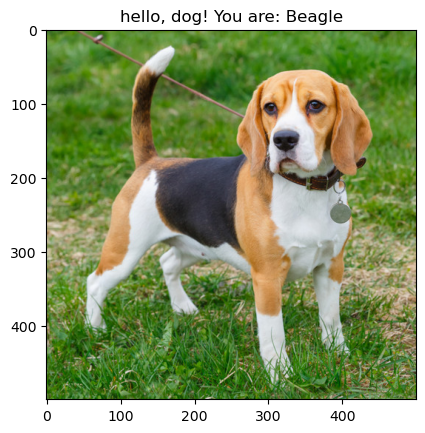

In [29]:
run_app("beagle.jpg")

GEN BUTTON :  None
<class 'str'>
E:/Mini Project/dog-human-classifier-neural-network/beagle.jpg
E:/Mini Project/dog-human-classifier-neural-network/beagle.jpg
500 characters in this file
TYPE :  <class 'str'>
E:/Mini Project/dog-human-classifier-neural-network/beagle.jpg
E:\Mini Project\dog-human-classifier-neural-network\beagle.jpg
<function open_file at 0x00000181D6D86560>
E:\Mini Project\dog-human-classifier-neural-network\beagle.jpg
----------------------------------
[[ 95  94  91 ... 118 117 116]
 [ 88  86  86 ... 118 117 116]
 [ 82  82  82 ... 117 116 115]
 ...
 [ 75  82 108 ... 105  82  56]
 [ 78  76 109 ... 117 111  93]
 [ 75  77 108 ... 149 151 131]]


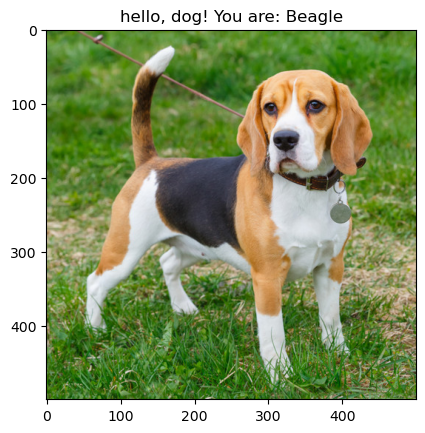

In [82]:
# Import the required Libraries
from tkinter import * 
from tkinter import ttk, filedialog
from tkinter.filedialog import askopenfile
import tkinter as tk
from PIL import Image, ImageTk

# Create an instance of tkinter frame
win = Tk()
win.title("Rover.ai")

# Set the geometry of tkinter frame
win.geometry("700x500")


def open_file():
   file = filedialog.askopenfile(mode="rb+", filetypes=[('*.jpg', '*.jpg')])
   print(type(file.name))
   print(file.name)
   #new_path = file.name
   #new_name = Path(file.name)
   new_path = f"{file.name}"
   print(new_path)
   im = Image.open(file)
   resized_image = im.resize((150, 150))
   tkimage = ImageTk.PhotoImage(resized_image)
   myvar = Label(win, image = tkimage)
   myvar.image = tkimage
   myvar.pack()
   if file:
      content = cv2.imread(file.name)
      #print(content)
      file.close()
      print("%d characters in this file" % len(content))
   print("TYPE : ",type(new_path))
   path = new_path.replace('/','\\')
   print(new_path)
   print(path)
   return path

# Add a Label widget
label = Label(win, text="Select the dog images", font=('Georgia 13'))
label.pack(pady=10)

# Create a Button
def return_image():
   run, confidence = run_app(open_file())
   label = Label(win, text="Its a " + str(run), font=('Georgia 13'))
   label.pack(pady=10)
   label = Label(win, text="Accuracy : " + str(confidence)[:2] + "%", font=('Georgia 13'))
   label.pack(pady=10)
   labe = Label(win, text="powered by DAAG", font=('Georgia 13'))
   labe.pack(pady=10)
   return label


browse_button = ttk.Button(win, text="Browse", command=open_file).pack(pady=20)

generate_button = ttk.Button(win, text="Generate Breed", command=return_image).pack(pady=20)

print("GEN BUTTON : ",generate_button)



#print_button = ttk.Button(win,text="Print", command=).pack(pady=20)

#generate_button = ttk.Button(win, text="Generate Breed", command= run_app(new_path)).pack(pady=20)

#generate_button = ttk.Button(win, text="Generate Breed", command=run_app()).pack(pady=20)

win.mainloop()

In [ ]:
print("HELLO")

HELLO


'Golden retriever'

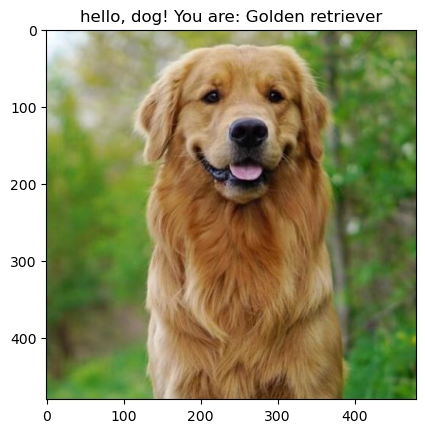

In [ ]:
run_app(r"C:\Users\Alex Christopher\Downloads\goldenretriever.jpg")

In [ ]:
from flask import Flask, request, render_template
#import tensorflow as tf
import numpy as np


app = Flask(__name__)           # created flask app
@app.route('/',methods=['GET'])      # routes to home(root directory)
def home():
    return render_template("web.html")


@app.route('/prediction',methods=['POST'])
def predict():
    img = request.files['dog_image']
    img_path = 'static/' + img.filename
    img.save(img_path)
    print(img_path)
    return render_template("web.html", dog_image = img_path)


if __name__ == '__main__':
    app.run(debug = True)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [ ]:
prediction, path = predict()

RuntimeError: Working outside of request context.

This typically means that you attempted to use functionality that needed
an active HTTP request. Consult the documentation on testing for
information about how to avoid this problem.